# <b>Phase 2: Data Exploration</b>

##### <b>Objectives:</b> 
- Explore key features about songs' data, artists' data and albums' data.
- Preprocess and answer some meaningful questions about songs' data, artists' data and albums' data.
- Prepare songs' data used for modeling.

### <b><u>Step 1</u>: Import library</b>

##### These are the main libraries used for data exploration:
- `numpy`: used for mathematical operations on matrices
- `pandas`: used to store data from .csv/.tsv files and operate functions on DataFrame
- `matplotlib`: used to visualize data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

### <b><u>Step 2</u>: Import data from .tsv files</b>

First, let's read the Spotify's songs data from `songs_data.tsv` file, artists data from `artists_data.tsv` file and albums data from `albums_data.tsv` file by using pandas.

In [2]:
songs_df_raw = pd.read_csv('../data/songs_data.tsv', sep='\t')
artists_df_raw = pd.read_csv("../data/artists_data.tsv", sep='\t')
albums_df_raw = pd.read_csv('../data/albums_data.tsv', sep = '\t')

### <b><u>Step 3</u>: Remove duplicate rows in the raw data</b>

Next, let's check whether the DataFrame has duplicate rows that needs to be removed.

In [3]:
duplicated_rows = songs_df_raw.duplicated().sum()
print(f'Number of duplicated rows: {duplicated_rows}')

Number of duplicated rows: 0


So there are 0 rows that are duplicated, which means each row in the DataFrame is unique.

But if there are any duplicate rows, we need to drop those 35 rows and see the first 5 rows of the dataset.

In [4]:
songs_df = songs_df_raw.drop_duplicates()
songs_df.head()

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,explicit,popularity
0,1RDvyOk4WtPCtoqciJwVn8,Dreamers [Music from the FIFA World Cup Qatar ...,"Jung Kook,BTS,FIFA Sound","k-pop boy group,k-pop","5382641,58715441,167875","80,92,77",183,Dreamers [Music from the FIFA World Cup Qatar ...,2022-11-20,81,201391,False,92
1,6A1IbMKwjvXibcrU1sdqKH,Em Là,"MONO,Onionn",NaN,"100123,2809","54,55",182,22,2022-08-18,60,197333,False,62
2,7bFFUPBiF15n8m8RziqS4o,dự báo thời tiết hôm nay mưa,GREY D,v-pop,39690,56,182,dự báo thời tiết hôm nay mưa – Maxi Single,2022-11-22,52,281493,False,62
3,4QjxvzEFwb63NZ1pp3wvHy,Chết Trong Em,Thịnh Suy,"vietnamese singer-songwriter,v-pop",359817,54,183,Chết Trong Em,2022-10-31,50,256663,False,62
4,5p8ThxM2OhJ0igfxkz0Z1q,Wild Flower (with youjeen),RM,k-rap,12005881,81,183,Indigo,2022-12-02,85,273499,False,88


Now, let's check the number of duplicated rows and check the first 5 rows in artist's DataFrame.

In [5]:
duplicated_rows = artists_df_raw.duplicated().sum()
print(f'Number of duplicated rows: {duplicated_rows}')
artists_df_raw.head()

Number of duplicated rows: 2948


,id,name,genres,followers,popularity
0,1LEtM3AleYg1xabW6CRkpi,Đen,"indie viet, v-pop, vietnamese hip hop, vietnam...",2899329,59
1,3rjcQ5VIWCN4q7UFetzdeO,JustaTee,"v-pop, vietnamese hip hop, vietnamese melodic rap",618216,55
2,5fa13NJjmn2uQ3dxZDi2Ge,Bich Phuong,v-pop,1182922,46
3,0qkGQFUrj8ERPAZcdpa79j,Phuc Du,v-pop,16509,46
4,71Cy7nzbfpuGJAS5FGxm93,Khoi Vu,vietnamese hip hop,25307,43


So there are 2948 duplicate rows. Finally, check the number of duplicated rows and see the first 5 rows in album's DataFrame.

In [6]:
duplicated_rows = albums_df_raw.duplicated().sum()
print(f'Number of duplicated rows: {duplicated_rows}')
albums_df_raw.head()

Number of duplicated rows: 2335


,id,name,popularity,available_markets,release_date,total_tracks
0,0gr5OmB74UhoANEXwYT3gE,Dreamers [Music from the FIFA World Cup Qatar ...,81,184,2022-11-20,1
1,3lZ0sW4znNieFHxGdyWXCj,22,60,183,2022-08-18,11
2,2AZXUAGWs90yNEUC4biubs,Chìm Sâu,52,183,2022-02-24,1
3,38JFpZ6hGFaQ4BUxT7XcI0,Chết Trong Em,50,184,2022-10-31,1
4,7q2bB2NNFlNbtqadbn55pL,dự báo thời tiết hôm nay mưa – Maxi Single,52,183,2022-11-22,3


----
### <b><u>Step 4</u>: Explore the dataset</b>

In this next step, we will explore the features of the dataset. First, let's check how many rows and columns in the song's DataFrame.

In [7]:
num_rows, num_cols = songs_df.shape
print("The number of rows: ", num_rows) 
print("The number of columns: ", num_cols)

The number of rows:  3000
The number of columns:  13


Next let's check the artist's number of rows and columns.

In [8]:
num_rows, num_cols = artists_df_raw.shape
print("The number of rows: ", num_rows) 
print("The number of columns: ", num_cols)

The number of rows:  4504
The number of columns:  5


Now, let's remove the duplicate rows in artist's DataFrame and check how many rows are there left

In [9]:
artists_df = artists_df_raw.drop_duplicates()
print("The remaining rows: ", artists_df.shape[0])

The remaining rows:  1556


Finally, we check the album's number of rows and columns.

In [10]:
num_rows, num_cols = albums_df_raw.shape
print("The number of rows: ", num_rows) 
print("The number of columns: ", num_cols)

The number of rows:  3000
The number of columns:  6


And now we remove the duplicate rows to see how many rows are there left.

In [11]:
album_df = albums_df_raw.drop_duplicates()
print("The remaining rows: ", album_df.shape[0])

The remaining rows:  665


Next, we need to know what are the columns of the DataFrame and check whether we need to remove any of them.

In [12]:
columns = songs_df.columns
columns

Index(['id', 'name', 'artist', 'genres', 'artist_followers',
       'artist_popularity', 'markets', 'album', 'released_date',
       'album_popularity', 'duration', 'explicit', 'popularity'],
      dtype='object')

We do the same thing on artist's DataFrame.

In [13]:
columns = artists_df.columns
columns

Index(['id', 'name', 'genres', 'followers', 'popularity'], dtype='object')

And finally the album's DataFrame.

In [14]:
columns = album_df.columns
columns

Index(['id', 'name', 'popularity', 'available_markets', 'release_date',
       'total_tracks'],
      dtype='object')

To discover the meaning of each column, we can load data from `songs_data_des.csv` file

In [15]:
songs_des_df = pd.read_csv('../data/description/songs_data_des.csv', on_bad_lines='skip')
songs_des_df

,column name,data type,meaning,example
0,id,string,The Spotify ID of track,3nqQXoyQOWXiESFLlDF1hG
1,name,string,The name of the track,Unholy (feat. Kim Petras)
2,artist,string,The artist(s) of the track,Sam Smith.Kim Petras
3,genres,string,The genres of that artist(s),uk pop.transpop.pop.dance pop
4,artist_followers,string,The number of followers of the artist(s),20747240.825245
5,artist_popularity,string,The popularity of the artist(s). The value wi...,87.82
6,markets,int,The number of countries which the track is av...,182
7,album,string,The album of the track,Unholy (feat. Kim Petras)
8,released_date,string,The released date of the track,2022-09-22
9,album_popularity,int,The popularity of the album.,88


- **id**: The Spotify ID of track
- **name**: The name of the track
- **artist**: The artist(s) of the track
- **genres**: The genres of that artist(s)
- **artist_followers**: The number of followers of the artist(s)
- **artist_popularity**: he popularity of the artist(s)
- **markets**: The number of countries which the track is available
- **album**: The album of the track
- **released_date**: The released date of the track
- **album_popularity**: The popularity of the album.
- **duration**: The duration of the track
- **explicit**: Check whether the lyrics of the track is explicit
- **popularity**: The popularity of the track

At the moment, we don't really need to use the feature `explicit` for data exploration. So we will decide to drop it for now.

In [16]:
songs_df.drop('explicit', inplace=True, axis=1, errors='ignore')

Next, let's check the column and its meaning in artist's DataFrame.

In [17]:
artists_des_df = pd.read_csv('../data/description/artists_data_des.csv', on_bad_lines='skip', delimiter='\t')
artists_des_df

,column name,data type,meaning,example
0,id,string,Id of artist,7EnWkKTmRG5i9rW93o5DZm
1,name,string,Name of artist,Axxad
2,genres,string,Artist genres,viral rap
3,followers,int,Number of followers,6826
4,popularity,int,Artist popularity,48


- **id**: Id of artist
- **name**: Name of artist	
- **genres**: Artist genres	
- **followers**: Number of followers	
- **popularity**: Artist popularity	

Finally, we check the columns and their meaning of album's DataFrame.

In [18]:
albums_des_df = pd.read_csv('../data/description/albums_data_des.csv', on_bad_lines='skip')
albums_des_df

,column name,data type,meaning,example
0,id,string,The Spotify ID of the album,7lPoGKpCGgdKFAxpudhAH5
1,name,string,The name of the album,Speak Your Mind (Deluxe)
2,popularity,int,"""The popularity of the album. The value will ...",72
3,available_markets,int,The number of markets (countries) which the a...,183
4,release_date,datetime,The day when the album was released,"""2018-04-27"""
5,total_tracks,int,The number of tracks which the album contain,18


- **id**: The Spotify ID of the album
- **name**: The name of the album
- **popularity**: The popularity score of the album
- **available_markets**: Number of avalaible markets
- **release_date**: The day when the album was released
- **total_tracks**: The number of tracks which the album contains

Choosing the right data type will make the analysis tasks error-free, easy, choosing the right functions and libraries to handle it.

Before pre-action processing, use the `open_object_dtype(s)` function to get the actual data type the columns contain:

In [19]:
def open_object_dtype(c):
    dtypes = set()
    c.apply(lambda x: dtypes.add(type(x)))
    
    return dtypes

Desired data type based on current tuple of song's DataFrame:

In [20]:
for col in songs_df.columns.to_list() :
    print(f'{col:<20}', open_object_dtype(songs_df[col]))

id                   {<class 'str'>}
name                 {<class 'str'>}
artist               {<class 'str'>}
genres               {<class 'float'>, <class 'str'>}
artist_followers     {<class 'str'>}
artist_popularity    {<class 'str'>}
markets              {<class 'int'>}
album                {<class 'str'>}
released_date        {<class 'str'>}
album_popularity     {<class 'int'>}
duration             {<class 'int'>}
popularity           {<class 'int'>}


Desired data type based on current tuple of artist's DataFrame:

In [21]:
for col in artists_df.columns.to_list() :
    print(f'{col:<20}', open_object_dtype(artists_df[col]))

id                   {<class 'str'>}
name                 {<class 'str'>}
genres               {<class 'float'>, <class 'str'>}
followers            {<class 'int'>}
popularity           {<class 'int'>}


Desired data type based on current tuple of album's DataFrame:

In [22]:
for col in album_df.columns.to_list() :
    print(f'{col:<20}', open_object_dtype(album_df[col]))

id                   {<class 'str'>}
name                 {<class 'str'>}
popularity           {<class 'int'>}
available_markets    {<class 'int'>}
release_date         {<class 'str'>}
total_tracks         {<class 'int'>}


So base on each column's data type(s), we can see that most of the columns have whether int or str type, whereas genres has 2 different data types: float and str, which we can tell from this column that it might have NaN values except for the album's DataFrame.

Now, we need to re-check the real data types of each column on artist's DataFrame.

In [23]:
dtypes = songs_df.dtypes
dtypes

id                   object
name                 object
artist               object
genres               object
artist_followers     object
artist_popularity    object
markets               int64
album                object
released_date        object
album_popularity      int64
duration              int64
popularity            int64
dtype: object

As we can see, there are only 4 numeric columns: `markets`, `album_popularity`, `duration` and `popularity`. The rest of the columns are either string or list types but in DataFrame, string and list are categorized as object.

Now, let's check on artist's DataFrame.

In [24]:
dtypes = artists_df.dtypes
dtypes

id            object
name          object
genres        object
followers      int64
popularity     int64
dtype: object

Artist's DataFrame has 2 numerical columns `followers` and `popularity`, 1 categorical column `genres`.

Finally we check on album's DataFrame.

In [25]:
dtypes = album_df.dtypes
dtypes

id                   object
name                 object
popularity            int64
available_markets     int64
release_date         object
total_tracks          int64
dtype: object

So album's DataFrame has 3 numerical columns `popularity`, `available_markets`, `total_tracks` and `release_date` (but have not been parsed to datetime yet so it is currently string type).

Let's get the detailed info and number of non-null values of each column.

In [26]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3000 non-null   object
 1   name               3000 non-null   object
 2   artist             3000 non-null   object
 3   genres             2811 non-null   object
 4   artist_followers   3000 non-null   object
 5   artist_popularity  3000 non-null   object
 6   markets            3000 non-null   int64 
 7   album              3000 non-null   object
 8   released_date      3000 non-null   object
 9   album_popularity   3000 non-null   int64 
 10  duration           3000 non-null   int64 
 11  popularity         3000 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 304.7+ KB


We can notice that there are some null values in genres column, therefore, we need to explore how many values are missing in each column of the dataset.

In [27]:
songs_df.isnull().sum()

id                     0
name                   0
artist                 0
genres               189
artist_followers       0
artist_popularity      0
markets                0
album                  0
released_date          0
album_popularity       0
duration               0
popularity             0
dtype: int64

So there are 189 missing values in the `genres` column, the other columns in the DataFrame does not have any null values. 

Next we do the same thing for artist's DataFrame info and total of NaN values in each column.

In [28]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 4495
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1556 non-null   object
 1   name        1556 non-null   object
 2   genres      1087 non-null   object
 3   followers   1556 non-null   int64 
 4   popularity  1556 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 72.9+ KB


Artist's DataFrame also has missing values in genres column.

In [29]:
artists_df.isnull().sum()

id              0
name            0
genres        469
followers       0
popularity      0
dtype: int64

So there are 469 missing values in genres column.

Finally, let's apply the same method for album's DataFrame.

In [30]:
album_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 0 to 2507
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 665 non-null    object
 1   name               665 non-null    object
 2   popularity         665 non-null    int64 
 3   available_markets  665 non-null    int64 
 4   release_date       665 non-null    object
 5   total_tracks       665 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 36.4+ KB


Surprisingly, album's DataFrame has no missing values.

As for now, we will move on to the data preprocessing step to clean and normalize all the data.

----
### <b><u>Step 6</u>: Preprocessing the dataset</b>

##### Distinguish between numerical and categorical columns
Based on the data, the numeric property has the following columns:
  - `markets`	
  - `album_popularity`	
  - `duration`	
  - `popularity`	
  - `artists_count`

Likewise, the categorical attribute has the following columns:
  - `genres`
  - `artist`
  - `album`

##### Calculate missing ratio, num_diff_vals and diff_vals of numerical and categorical columns

In this part, we need to explore values in categorical columns. 

We build some help functions below to calculate the missing ratio of values in the columns (in percentage), calculate number of different values and the list of different values.

In [31]:
def missing_ratio(c):
    return c.isnull().sum() / c.__len__() * 100

def num_diff_vals(c):
    if c.all() == songs_df['genres'].all() or c.all() == songs_df['artist'].all():
        return c.str.split(',').explode().nunique()
    return c.nunique(dropna=True)

def diff_vals(c):
    if c.all() == songs_df['genres'].all() or c.all() == songs_df['artist'].all():
        return c.str.split(',').explode().value_counts().keys().to_list()
    return c.dropna().unique()

def lower_quantile(c):
    if c.all() == songs_df['released_date'].all():
        return c.describe(datetime_is_numeric=True)['25%']
    return c.describe(datetime_is_numeric=True)['25%']

def upper_quantile(c):
    if c.all() == songs_df['released_date'].all():
        return c.describe(datetime_is_numeric=True)['25%']
    return c.describe()['75%']

def mean(c):
    if c.all() == songs_df['released_date'].all():
        return c.describe(datetime_is_numeric=True)['25%']
    return c.mean()

def median(c):
    if c.all() == songs_df['released_date'].all():
        return c.describe(datetime_is_numeric=True)['25%']
    return c.median()

For categorical columns, we need to specify what is the missing ratio, number of unique values and list all of the unique values. There are 3 categorical columns in the dataset: `genres`, `artist` and `album`.

In [32]:
songs_df[['genres', 'artist', 'album']].agg([missing_ratio, num_diff_vals, diff_vals])

,genres,artist,album
missing_ratio,6.3,0.0,0.0
num_diff_vals,434,1542,2073
diff_vals,"[pop, v-pop, dance pop, vietnamese hip hop, uk...","[Ed Sheeran, Justin Bieber, David Guetta, Tayl...","[Winter Blues 2023, Winter Vibes 2023, Indigo,..."


From the insights, we could see that genres column has a missing ratio of 6.3% in total. Furthermore, there are 434 unique genres in the whole dataset.

Hence, there are 1542 unique artists and 2073 unique albums in total from the DataFrame. These are very important numbers that we can use to analyze.

Now, let's explore the artist's DataFrame categorical columns.

In [33]:
artists_df[['genres']].agg([missing_ratio, num_diff_vals, diff_vals])

,genres
missing_ratio,30.141388
num_diff_vals,551
diff_vals,"[v-pop, pop, vietnamese hip hop, k-pop, dance..."


So for the artist's DataFrame, genres column has a missing ratio of 30.1%, with 551 unique genres.

##### 1. Genres

First we will need to preprocess data in `genres` column since it has null values. Each data in `genres` column is a string of genre(s) seperated by a comma (`,`). 

Therefore, we need to convert the string data into a list of genres, then fill all of the null values with `None`.

In [34]:
songs_df['genres'] = songs_df['genres'].str.split(',')
songs_df['genres'].fillna('None', inplace=True)

We will do the same thing for genres column in artist's DataFrame

In [35]:
artists_df['genres'].fillna('None', inplace=True)
artists_df['genres'] = artists_df['genres'].str.split(',')

Next, we will add another column called `main_genre` to the song's DataFrame, since we think it might be useful for data modeling.

We take the first genre that appeared in the list to be the main genre.

In [36]:
songs_df['main_genre'] = songs_df['genres'].apply(lambda x: x[0] if type(x) == list else x)

##### 2. Artists

Let's move on to the `artist` column in song's DataFrame. Each data in this column is also a string of artist(s) separated by a comma. 

So we also need to convert string data into a list.

In [37]:
songs_df['artist'] = songs_df['artist'].str.split(',')

We found it also might be interesting that we add another column called `artists_count` into the DataFrame, it can be used to answer some meaningful questions.

In [38]:
songs_df['artists_count'] = songs_df['artist'].apply(len)

##### 3. Released date

We have a datetime datatype column in the song's DataFrame and album's DataFrame, which is the released date of the track. Therefore, we need to convert string data into datetime by using `to_datetime` function in pandas.

In [39]:
songs_df['released_date'] = pd.to_datetime(songs_df['released_date'], format='%Y-%m-%d', errors='coerce')
album_df['release_date'] = pd.to_datetime(album_df['release_date'], format='%Y-%m-%d', errors='coerce')

Now, we would like to explore some numeric stats in this column: mean, min, lower quantile, median, upper quantile, max

##### Calculate missing ratio, min and max values of numerical columns

Now we can explore the missing ratio, min and max values in numerical colums.

There are 5 numerical columns in total, including: `markets`, `album_popularity`, `duration`, `popularity` and `artists_count`. Let's explore missing ratio, min value and max value of these columns.

In [40]:
songs_df[songs_df.describe(datetime_is_numeric=True).columns].agg([missing_ratio, min, lower_quantile, mean, median, upper_quantile, max])

,markets,released_date,album_popularity,duration,popularity,artists_count
missing_ratio,0.0,0.0,0.000000,0.0,0.000000,0.0
min,1.0,2020-01-01 00:00:00,0.000000,51913.0,0.000000,1.0
lower_quantile,181.0,2020-10-23 00:00:00,14.750000,175238.0,7.000000,1.0
mean,181.0,2020-10-23 00:00:00,37.236667,175238.0,42.386333,1.0
median,181.0,2020-10-23 00:00:00,37.000000,175238.0,45.000000,1.0
upper_quantile,181.0,2020-10-23 00:00:00,59.000000,175238.0,66.000000,1.0
max,184.0,2022-12-17 00:00:00,95.000000,613026.0,100.000000,10.0


There are some noticeable values:
- The oldest song in the data is released on Jan 1, 2020, whereas the latest song is released on Dec 17, 2022.
- 1 is the minimum value of markets that a songs is available.
- The shortest song duration is 51913 ms ~ 52 seconds!
- 10 is the maximum value of the number of artists involved in a song!
- The highest album popularity score is 95, whereas highest song popularity score is 100!

Next, artist's DataFrame description.

In [41]:
artists_df[artists_df.describe().columns].agg([missing_ratio, min, lower_quantile, mean, median, upper_quantile, max]).round(1)

,followers,popularity
missing_ratio,0.0,0.0
min,0.0,1.0
lower_quantile,2662.5,34.0
mean,2194930.6,34.0
median,48214.0,34.0
upper_quantile,634091.8,34.0
max,106484775.0,100.0


Some noticeable values from artist's description:
- The maximum followers for an artist is over 106 million, whereas the minimum followers are 0!
- The maximum artist's popularity is 100, whereas minimum popularity is 1 and most of the artists are converge to 45!

Finally, album's DataFrame description.

In [42]:
album_df[album_df.describe(datetime_is_numeric=True).columns].agg([missing_ratio, min, lower_quantile, mean, median, upper_quantile, max]).round(1)

,popularity,available_markets,release_date,total_tracks
missing_ratio,0.0,0.0,0.0,0.0
min,0.0,1.0,2020-01-01 00:00:00,1.0
lower_quantile,2.0,134.0,2021-10-21 00:00:00,1.0
mean,32.1,134.0,2021-10-21 00:00:00,1.0
median,40.0,134.0,2021-10-21 00:00:00,1.0
upper_quantile,50.0,134.0,2021-10-21 00:00:00,1.0
max,95.0,184.0,2022-12-17 00:00:00,141.0


Noticeable values from the description:
- 141 is the largest number of tracks in an album, whereas 1 is the smallest number of tracks, which is a single
- Maximum and minimum popularity score of an album is 95 and 0 respectively!

### <b><u>Step 6</u>: Normalizing columns in the dataset</b>

##### 1. Artist followers

Each data in `artist_followers` column is a string of followers of respective artist(s) separated by a comma.

Therefore, we need to convert string data to a list and convert each number of followers from string to int.

In [43]:
songs_df['artist_followers'] = songs_df['artist_followers'].str.split(',')
songs_df['artist_followers'] = songs_df['artist_followers'].apply(lambda x: list(map(int, x)))

Next step, since we want to represent the artists' followers as a specific value only, let's normalize the list of followers into 1 number by calculating the vectorized length of the elements in the list.

In [44]:
songs_df['artist_followers'] = songs_df['artist_followers'].apply(lambda x: np.sqrt(np.sum(list(map(lambda y: y**2, x)))))
songs_df['artist_followers'] = songs_df['artist_followers'].astype('int64')

##### 2. Artist popularity

`artist_popularity` column has the same feature as `artist_followers`. So we also need to convert each data from string to list and then map all the values from string to numbers.

In [45]:
songs_df['artist_popularity'] = songs_df['artist_popularity'].str.split(',')
songs_df['artist_popularity'] = songs_df['artist_popularity'].apply(lambda x: list(map(int, x)))

Furthermore, we also want to represent the artists' popularity by 1 number only, therefore, let's calculate the vectorized length of every element in the list of each data.

In [46]:
songs_df['artist_popularity'] = songs_df['artist_popularity'].apply(lambda x: min(100, np.sqrt(np.sum(list(map(lambda y: y**2, x))))))
songs_df['artist_popularity'] = songs_df['artist_popularity'].astype('int64')

----
### <b><u> Step 7</u>: Ask some meaningful questions about the data</b>

##### **QUESTION 1:** What are the top 10 most popular genres and visualize the number of songs each genre is involved in.

**MEANING:** We would like to know what is the top 10 genres that artists usually go for the understand the music trends in 2020-2022.

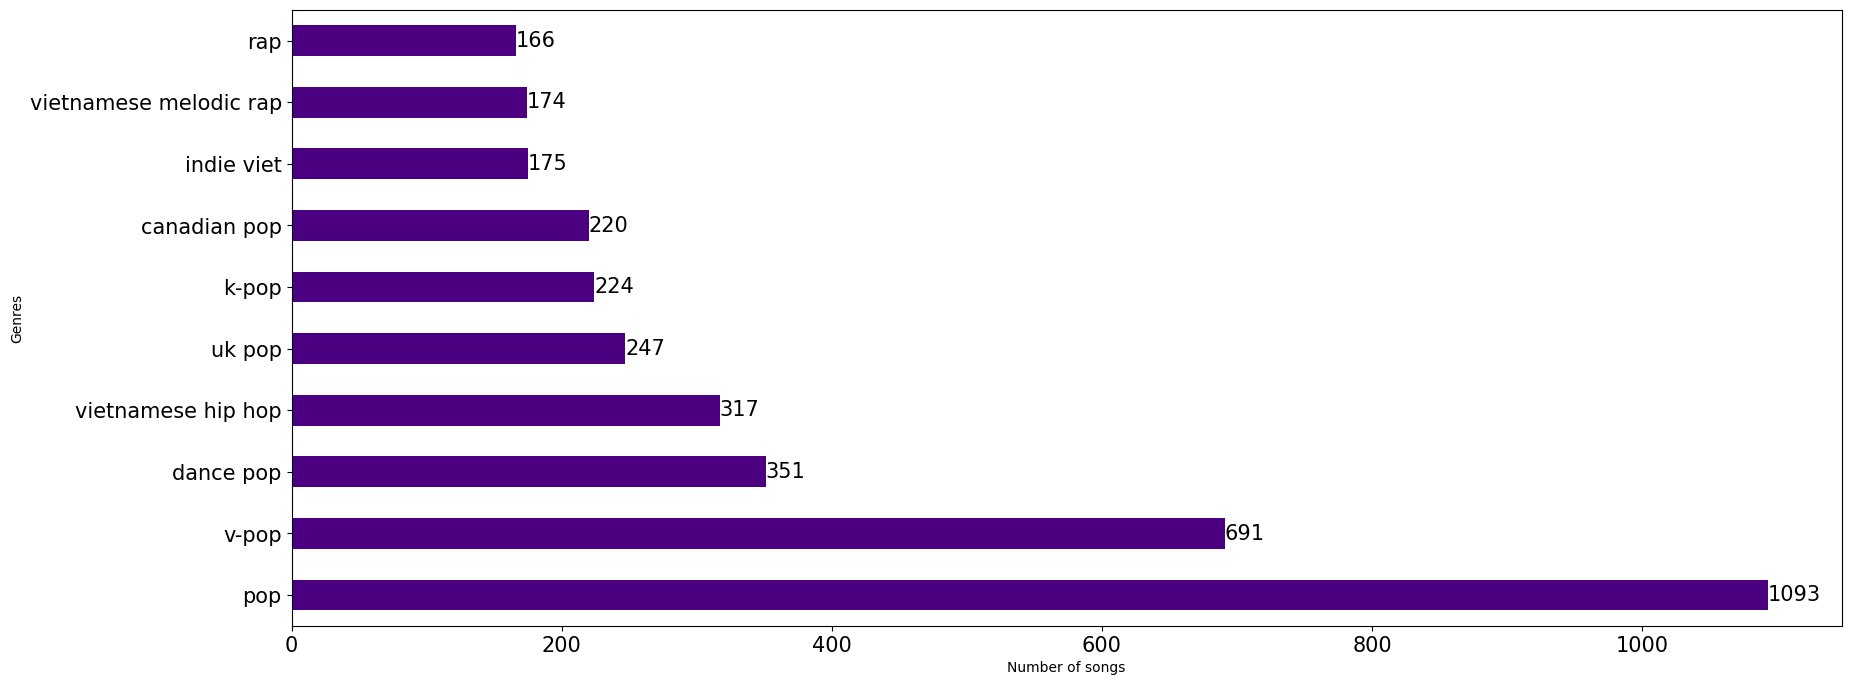

In [47]:
top_10_genres = songs_df['genres'].str.join(',').str.split(',').explode().value_counts().drop(['N', 'o', 'n', 'e']).nlargest(n=10)
ax = top_10_genres.plot(kind='barh', color='indigo', figsize=(20, 8), 
                        xlabel='Number of songs', ylabel='Genres', fontsize=15);
ax.bar_label(ax.containers[0], fontsize=15);

**COMMENT:**
- From the results above, we can see that pop has always been the most popular genre. 

- There are also some popular pop variants such as v-pop, k-pop, uk pop... (at least in Vietnam market). 

- Vietnamese indie and rap are 2 potential genres.

Now, let's visualize the top 10 genres in pie chart to see the percentage of each top 10 genres has gained.

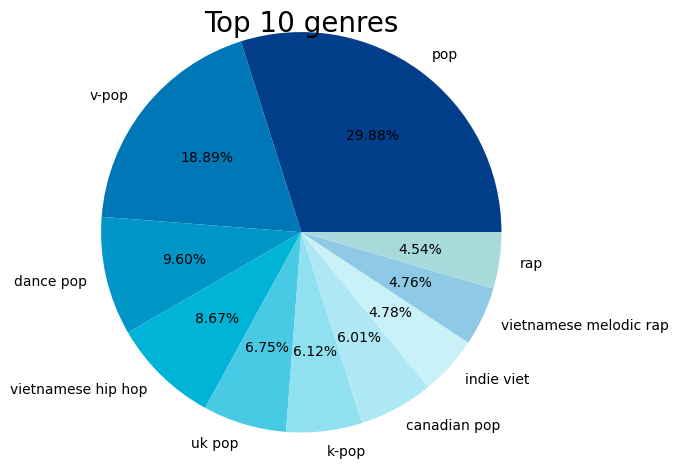

In [48]:
plt.figure(figsize=(8, 5))
plt.title('Top 10 genres', fontsize=20)
plt.pie(top_10_genres.to_numpy().reshape(-1), 
        labels=[i for i in top_10_genres.keys()],
        textprops={"fontsize":10},
        radius=1.3, startangle=0,
        colors=['#023e8a', '#0077b6', '#0096c7', '#00b4d8', '#48cae4', '#90e0ef', '#ade8f4', '#caf0f8', '#8ecae6', '#a8dadc'],
        autopct='%.02f%%')
plt.show()

**COMMENT:** From the pie chart, pop has a percentage of almost 30%, and if we combine all the variants of pop genre together, the percentage will be approximately 60% to 70%, and the 2 potential genres, rap and Vietnamese rap, has a total of almost 10%.

##### **QUESTION 2:** Top 10 artists that has the most songs released in 2020-2022 and visualize the number of songs of each artist.

**MEANING:** From that, we will know a group of active artists and their contribution is impactful to the music industry.

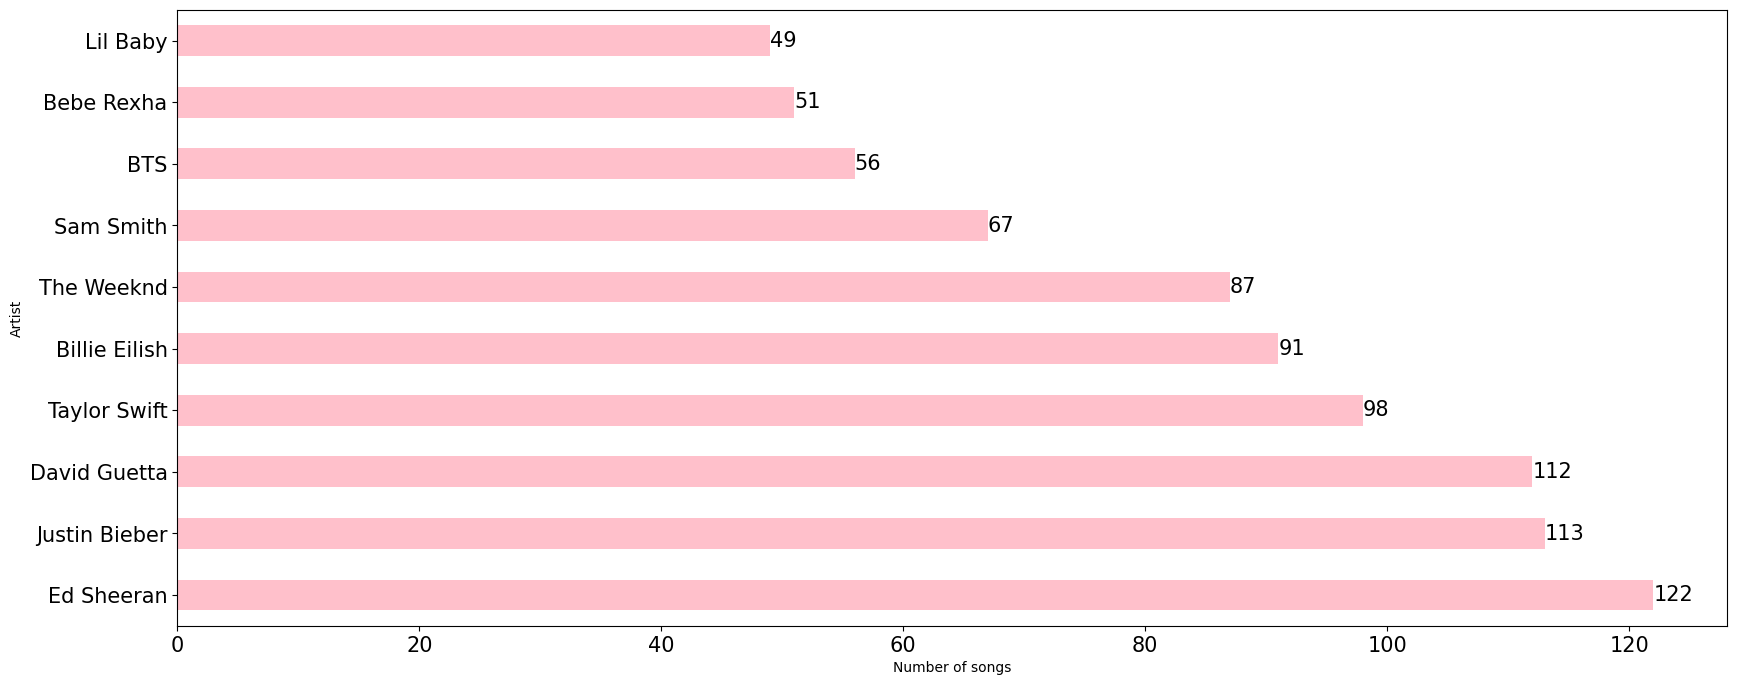

In [49]:
top_10_artists = songs_df['artist'].str.join(',').str.split(',').explode().value_counts().nlargest(n=10)
ax = top_10_artists.plot(kind='barh', color='pink', figsize=(20, 8), 
                        xlabel='Number of songs', ylabel='Artist', fontsize=15);
ax.bar_label(ax.containers[0], fontsize=15);

**COMMENT:** Most of the artists in this chart are from us-uk, except for the only asian representative, BTS. These top 10 artists released from at least over 50 songs to over 100 songs each artist, these artists are quite active in song producing.

Now, let's also visualize the top 10 artists with pie chart.

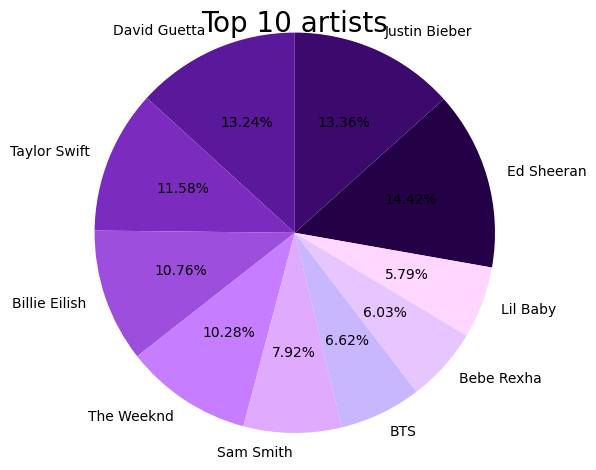

In [50]:
plt.figure(figsize=(8, 5))
plt.title('Top 10 artists', fontsize=20)
plt.pie(top_10_artists.to_numpy().reshape(-1), 
        labels=[i for i in top_10_artists.keys()],
        textprops={"fontsize":10},
        radius=1.3, startangle=-10,
        colors=['#240046', '#3c096c', '#5a189a', '#7b2cbf', '#9d4edd', '#c77dff', '#e0aaff', '#c8b6ff', '#e7c6ff', '#ffd6ff'],
        autopct='%.02f%%')
plt.show()

**COMMENT:** From the stats in the pie chart, we can see that Ed Sheeran, Justin Bieber, David Guetta, Taylor Swift and Billie Eilish have always been the top 5 most active artists since their contribution of songs compared to all of the top 10 artists' songs is about 11% to 14% each.

Lil Baby, even though has the least percentage with only 5.79%, but this artist is a very potential one and might be a rising star.

##### **QUESTION 3:** What are the top 10 most popular albums and visualize the number of songs mentioned in each album.

**MEANING:** Discover some special features about those albums as well as artists and songs that we just did earlier.

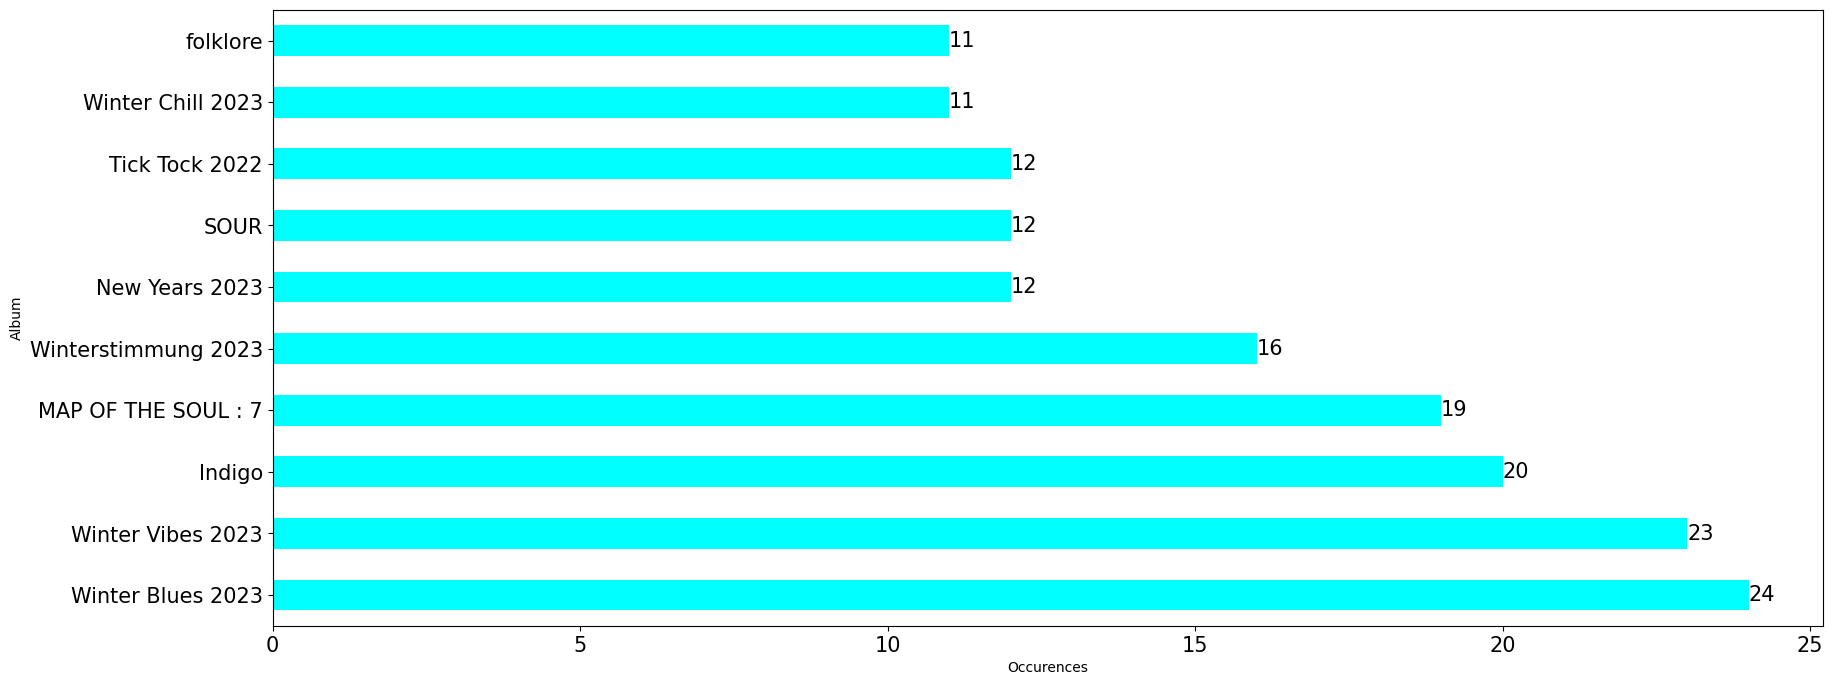

In [51]:
top_10_albums = songs_df['album'].value_counts().nlargest(n=10)
ax = top_10_albums.plot(kind='barh', color='cyan', figsize=(20, 8), 
                        xlabel='Occurences', ylabel='Album', fontsize=15);
ax.bar_label(ax.containers[0], fontsize=15);

**COMMENT:** At first glance, these 10 albums have at least over 10 songs and at most over 20 songs. Most of the albums have a winter theme since there are 4 albums are about winter, and 5 albums have the year 2023 in it.

Therefore, we discover that the albums that have the most songs in the dataset are about end of year 2022 and new year 2023. 

Now let's also visualize the top 10 albums as a pie chart to compared the percentage between them.

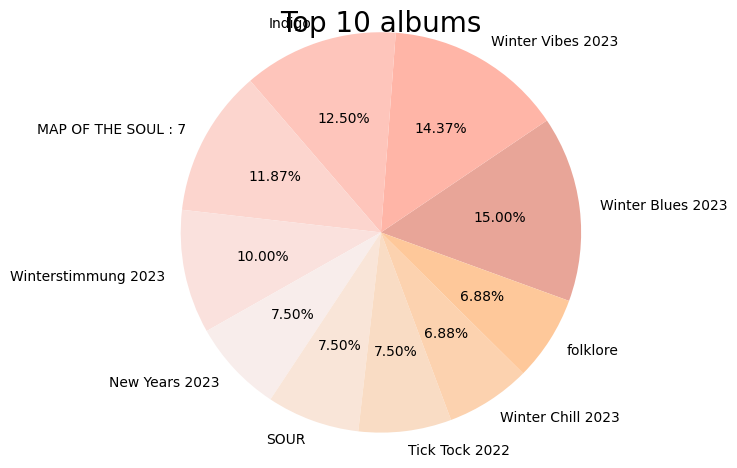

In [52]:
plt.figure(figsize=(8, 5))
plt.title('Top 10 albums', fontsize=20)
plt.pie(top_10_albums.to_numpy().reshape(-1), 
        labels=[i for i in top_10_albums.keys()],
        textprops={"fontsize":10},
        radius=1.3, startangle=-20,
        colors=['#e8a598', '#ffb5a7', '#fec5bb', '#fcd5ce', '#fae1dd', '#f8edeb', '#f9e5d8', '#f9dcc4', '#fcd2af', '#fec89a'],
        autopct='%.02f%%')
plt.show()

**COMMENT:** This is a very balance pie chart since there are no significant differences between the percentage. There are 3 albums that have the same percentage of 7.5% and 2 albums that have the same percentage 6.88%, Winter Blues 2023 has the highest percentage with 15%.

Besides that, there are 2 orginal albums from original artists: MAP OF THE SOUL: 7 with 11.87% and SOUR with 7.5%.

##### **QUESTION 4**: For each song popularity value, visualize the number of songs.

**MEANING:** We would like to know for each song's popularity score from 0 to 100, how many songs each score has in order to understand how the songs' popularity in the dataset is spreaded, therefore, we have insights about the current status about the music industry.

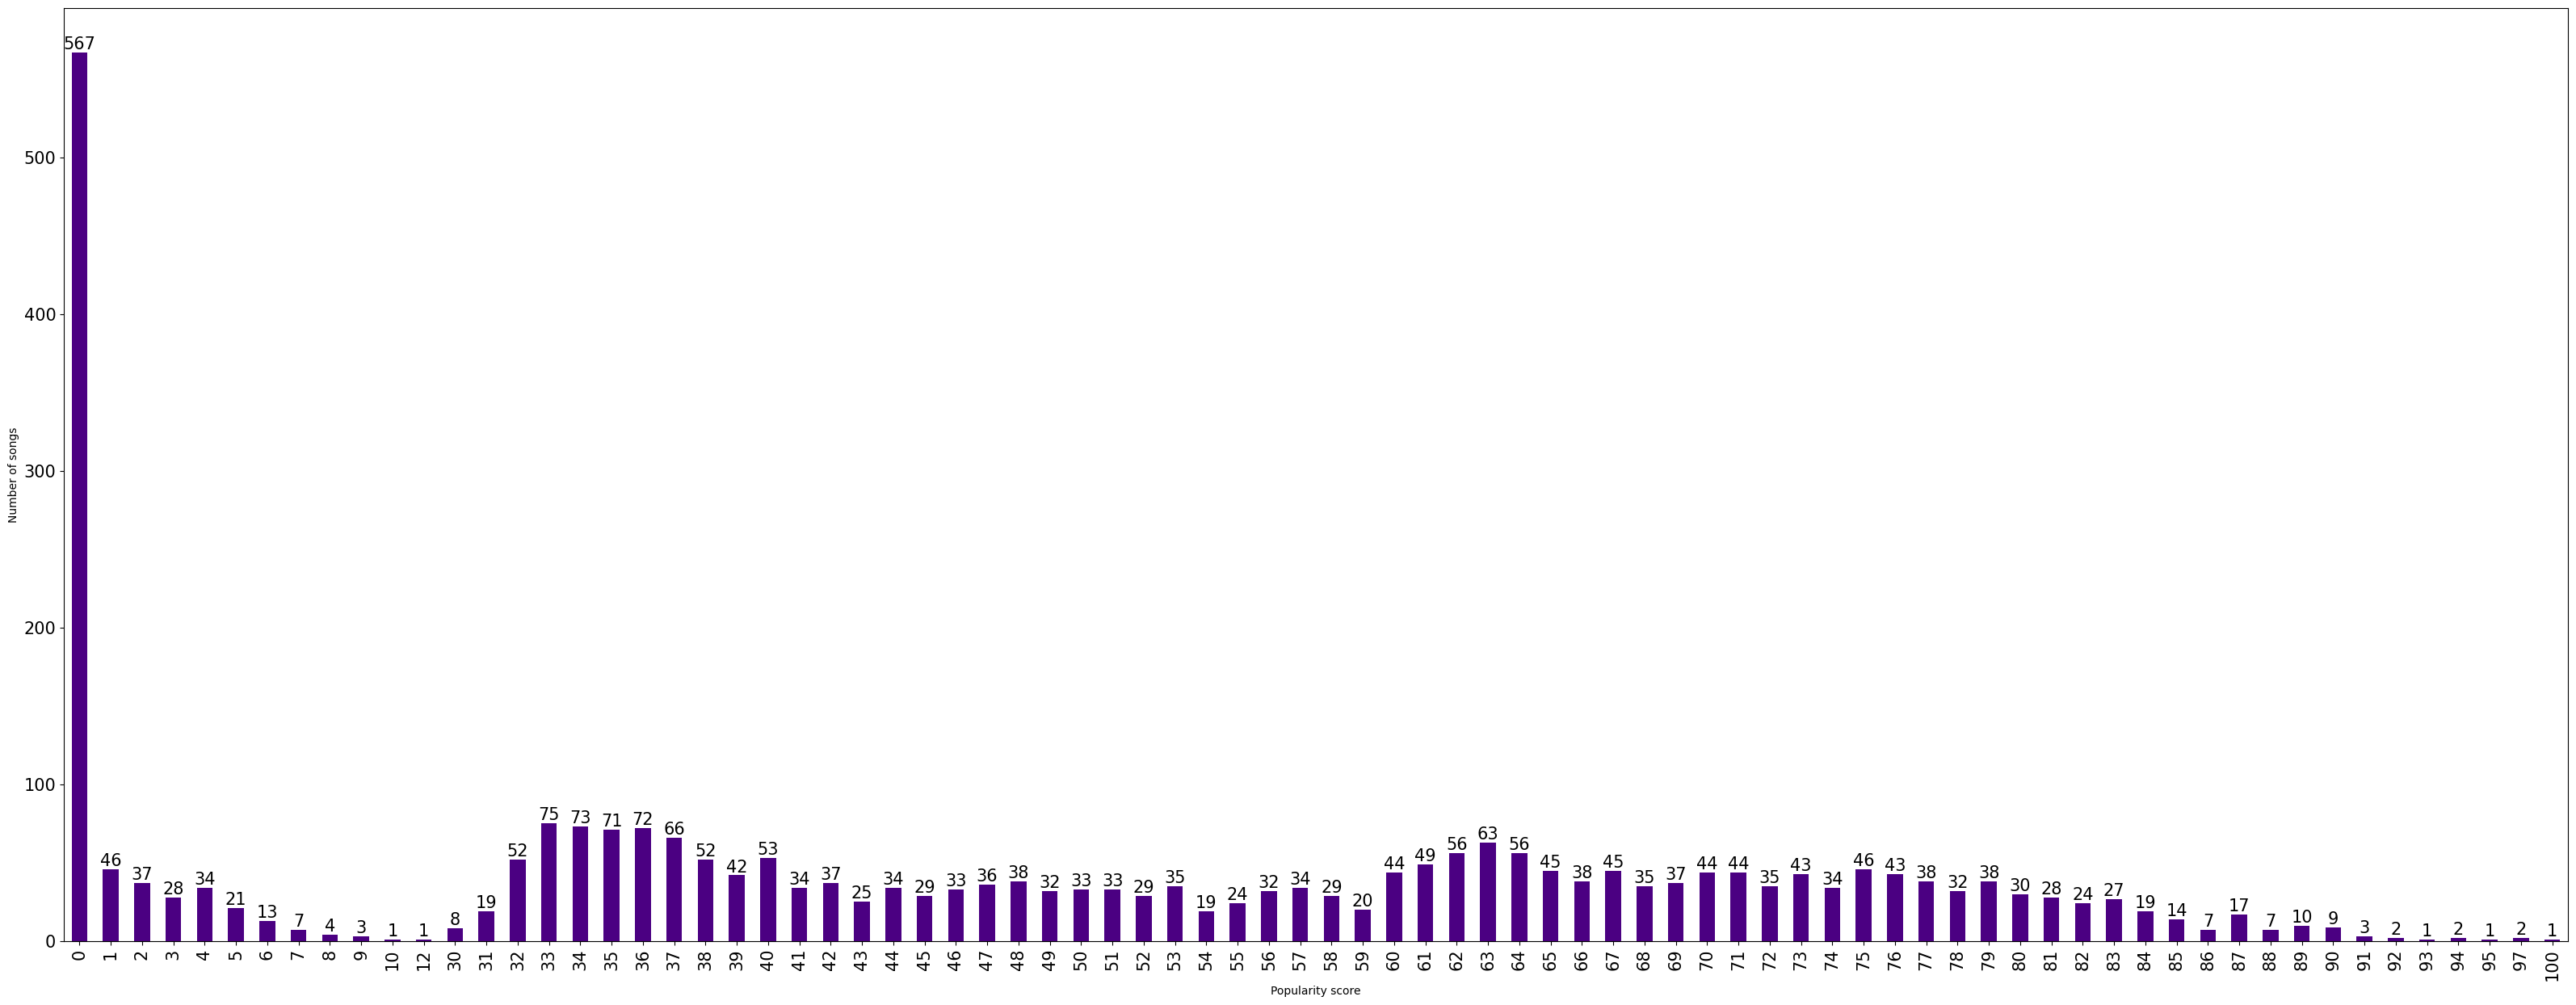

In [53]:
ax = songs_df['popularity'].value_counts().sort_index(ascending=True).plot(kind='bar', color='indigo', figsize=(40, 15), 
                        xlabel='Popularity score', ylabel='Number of songs', fontsize=15);
ax.bar_label(ax.containers[0], fontsize=15);

**COMMENT:** Song's popularity score at 0 has the most songs (over 500 songs). Meanwhile, most of the songs are scored in range from 31 to 85 has around 50-100 songs each score label.

On the other hand, there are only a few songs that has popularity over 90 and 100 at most. Therefore, the current music industry status is balance.

##### **QUESTION 5:** For each album popularity value, visualize the number of albums.

**MEANING:** We would like to know for each album's popularity score from 0 to 100, how many albums each score has in order to understand how the album's popularity score affected to a song's popularity and then give insights.

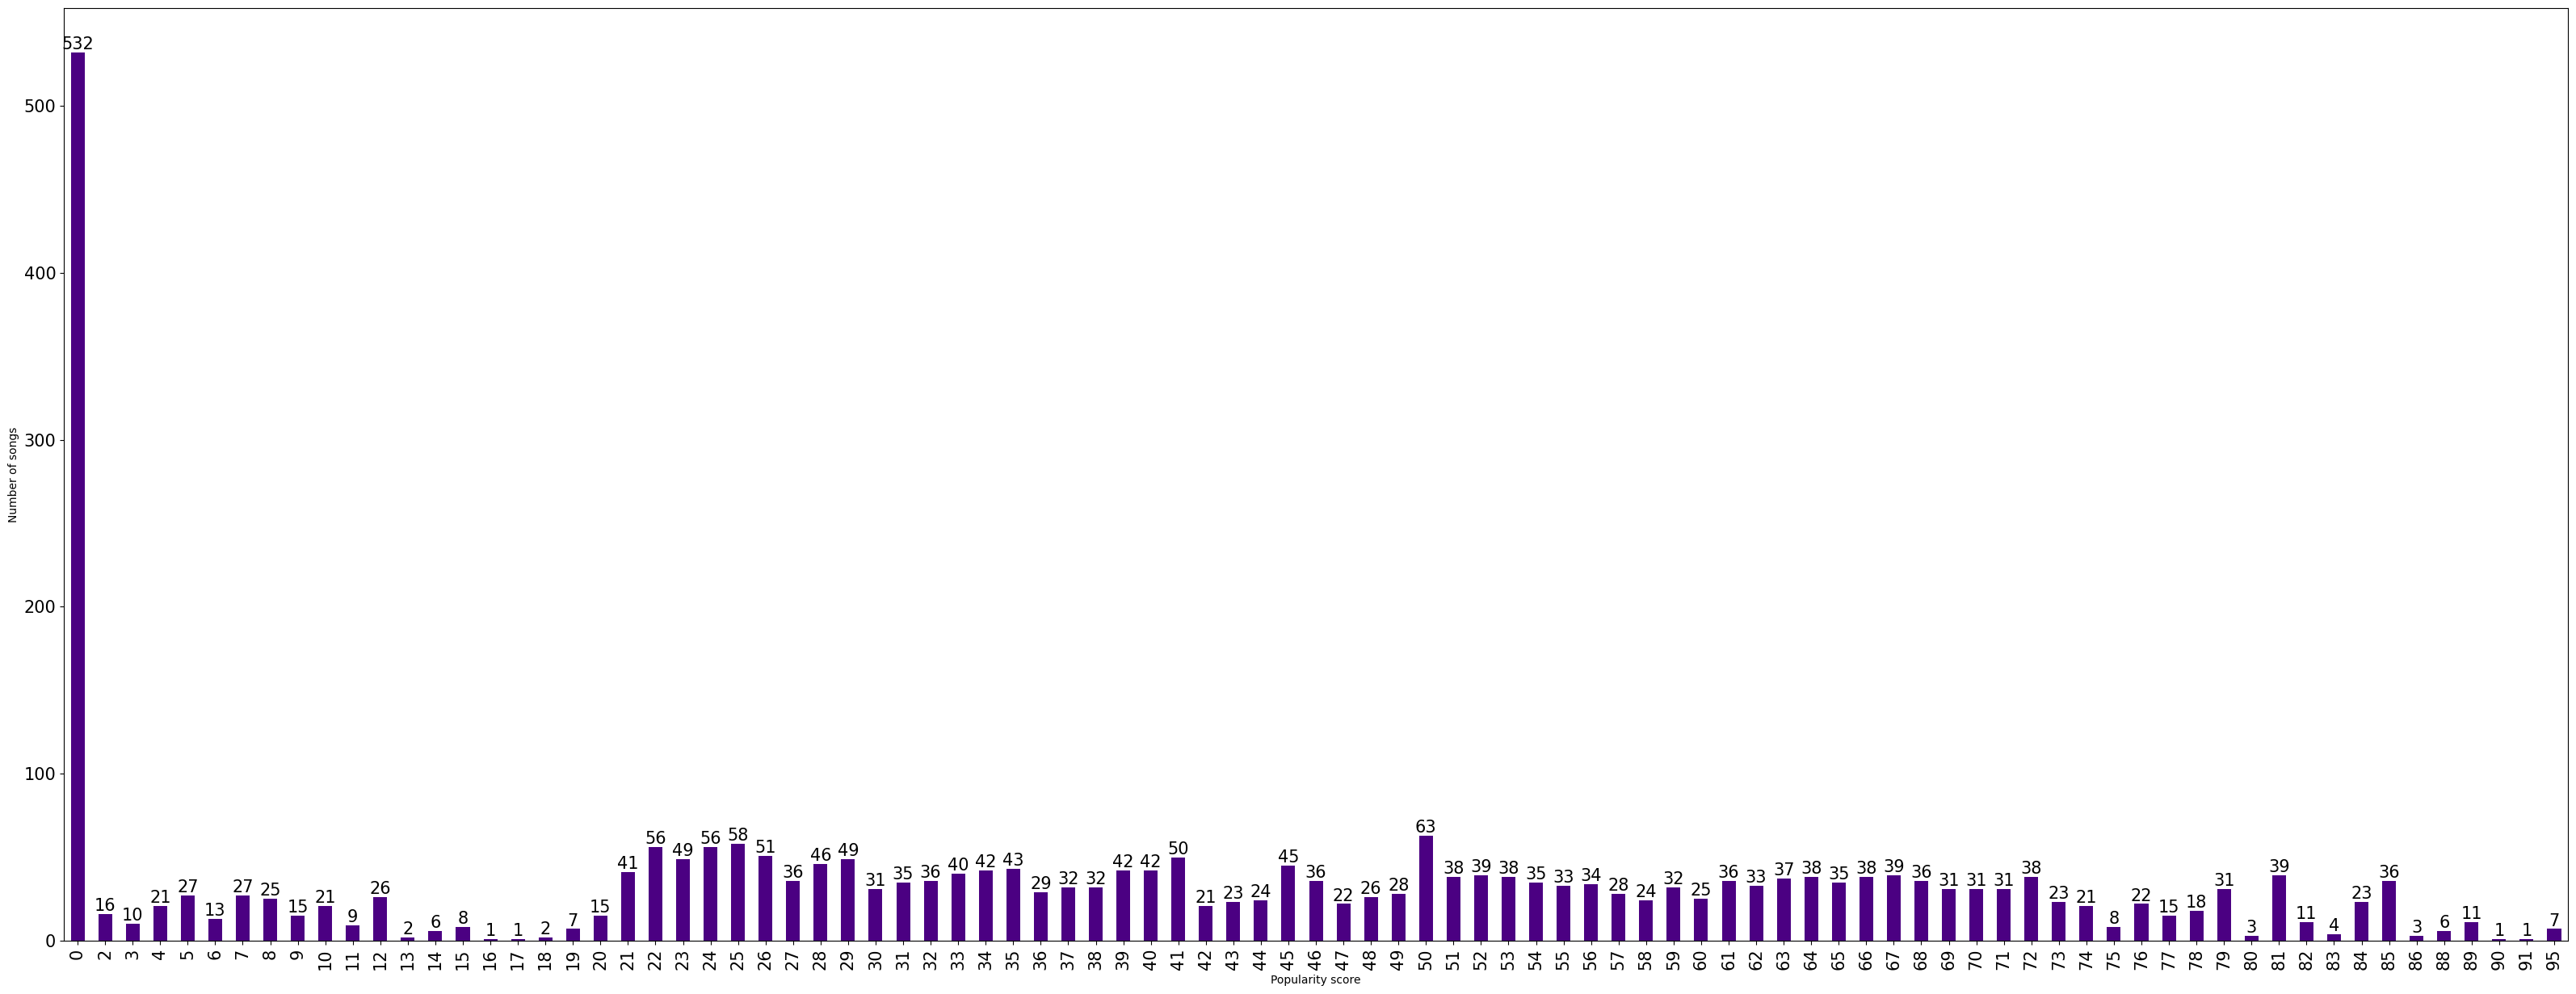

In [54]:
ax = songs_df['album_popularity'].value_counts().sort_index(ascending=True).plot(kind='bar', color='indigo', figsize=(40, 15), 
                        xlabel='Popularity score', ylabel='Number of songs', fontsize=15);
ax.bar_label(ax.containers[0], fontsize=15);

**COMMENT:** This album's popularity chart has almost the same pattern as the song's popularity, where 0 score value has the most number of albums (over 500 songs) and most of the average numbers are spreaded from 20 to 85 score. The maximum score of an album is 95!

##### **QUESTION 6:** For each artist's popularity value, visualize the number of artist/collaboration.

**MEANING:** We would like to know for each artist's popularity score from 0 to 100, how many artist/collaboration each score has in order to understand how the artist's popularity value affected to the song's popularity in order to provide insights.

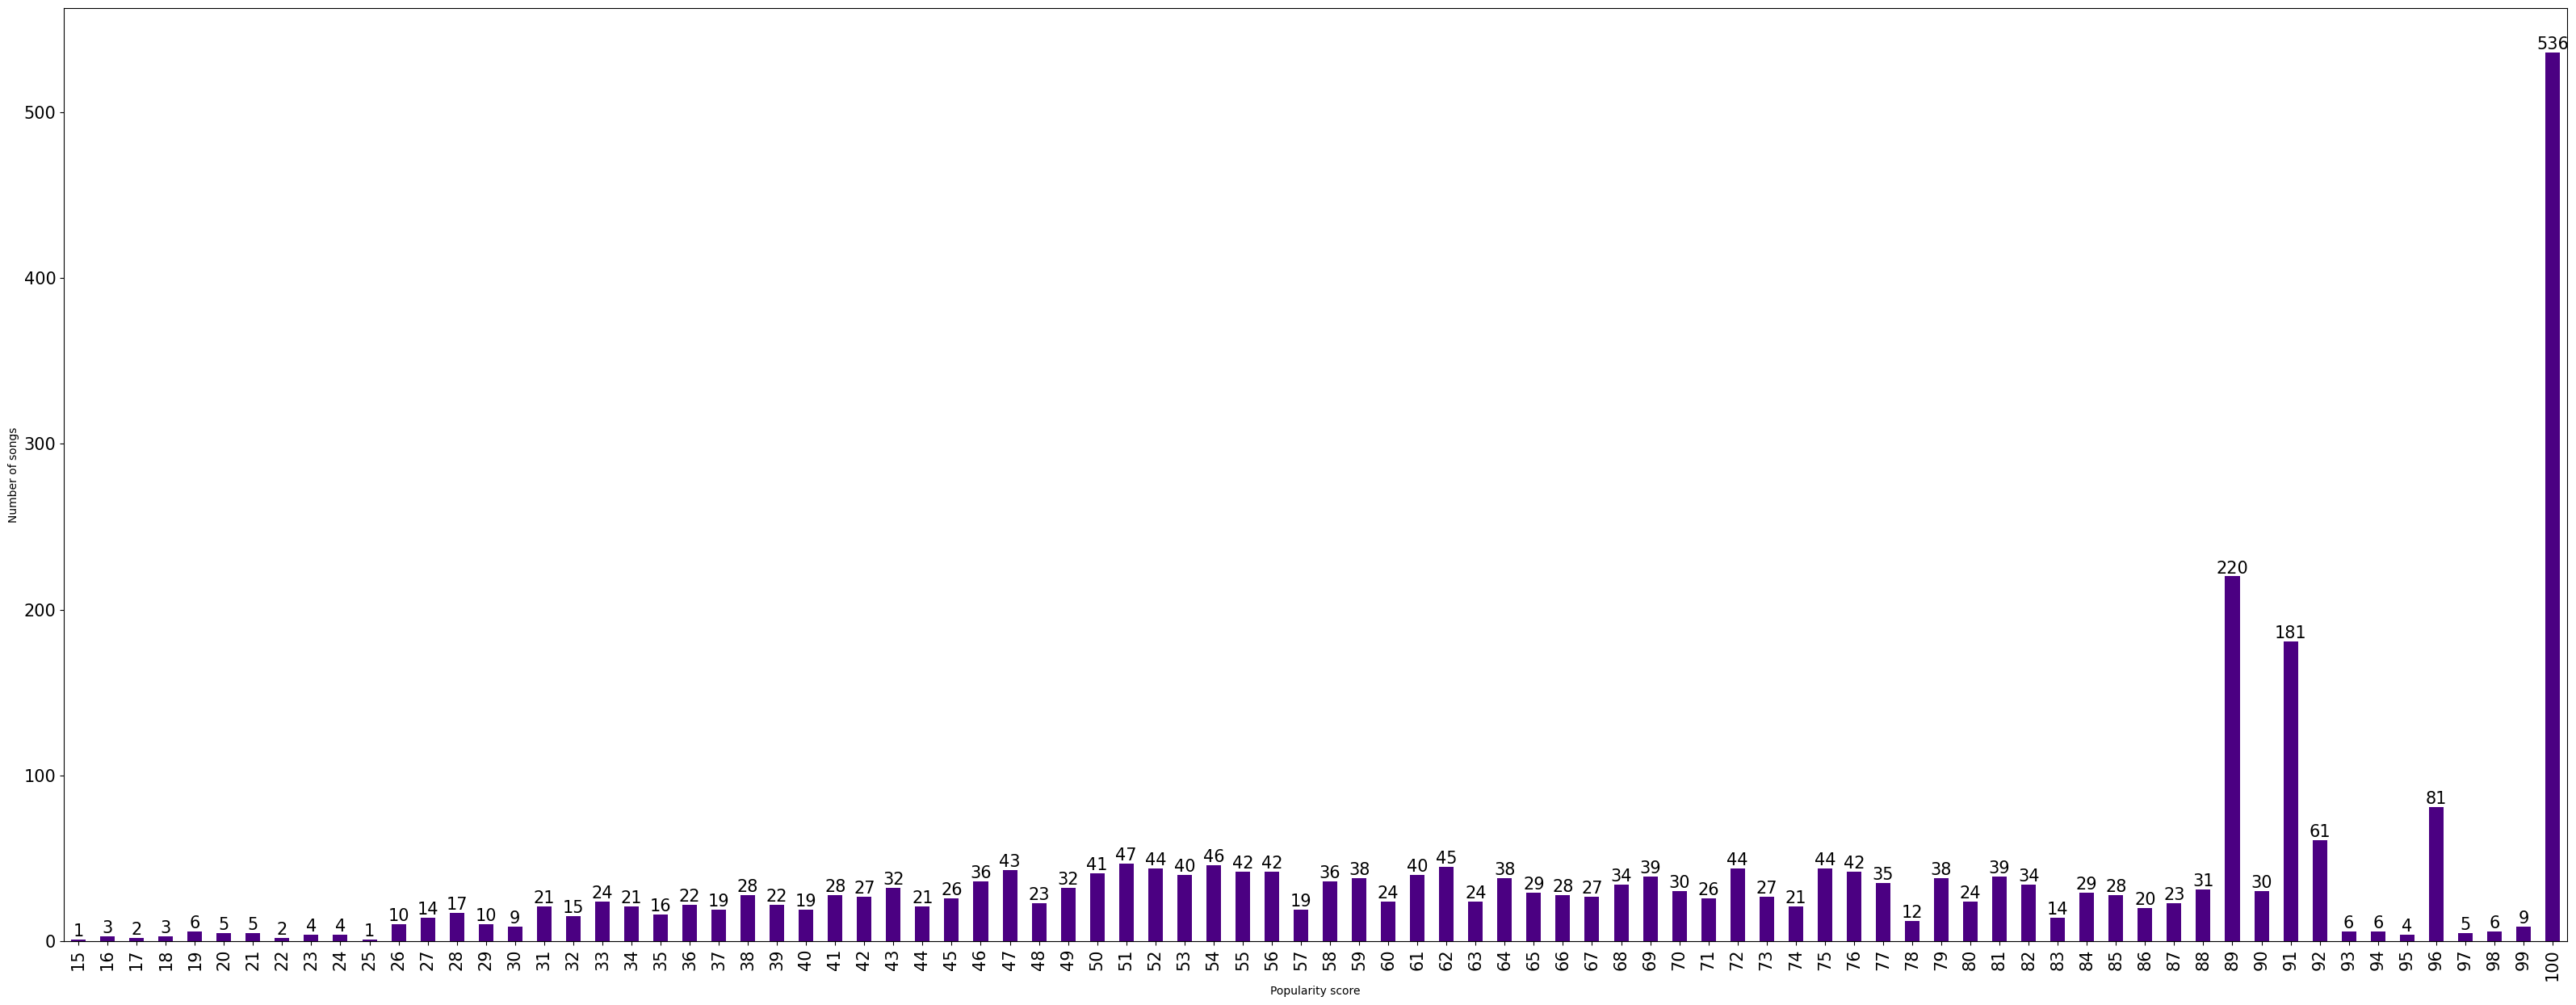

In [55]:
ax = songs_df['artist_popularity'].value_counts().sort_index(ascending=True).plot(kind='bar', color='indigo', figsize=(40, 15), 
                        xlabel='Popularity score', ylabel='Number of songs', fontsize=15);
ax.bar_label(ax.containers[0], fontsize=15);

**COMMENT:** Now, the artist's popularity chart has the opposite pattern compared to album's and song's. Surprisingly, the minimum score of an artist/collaboration is 15, which is great. 100 score value has the most number of artists/collaborations (over 500). This means most of the artists/collaborations in the dataset are quite famous and collaboration is what it makes the popularity higher (based on the preprocess step).

##### **QUESTION 7:** Visualize the number of artists involved in 1 song in pie chart to explore insights

**MEANING:** Know how much percentage that a song is released by only 1 original artist or collaborated by many artists.

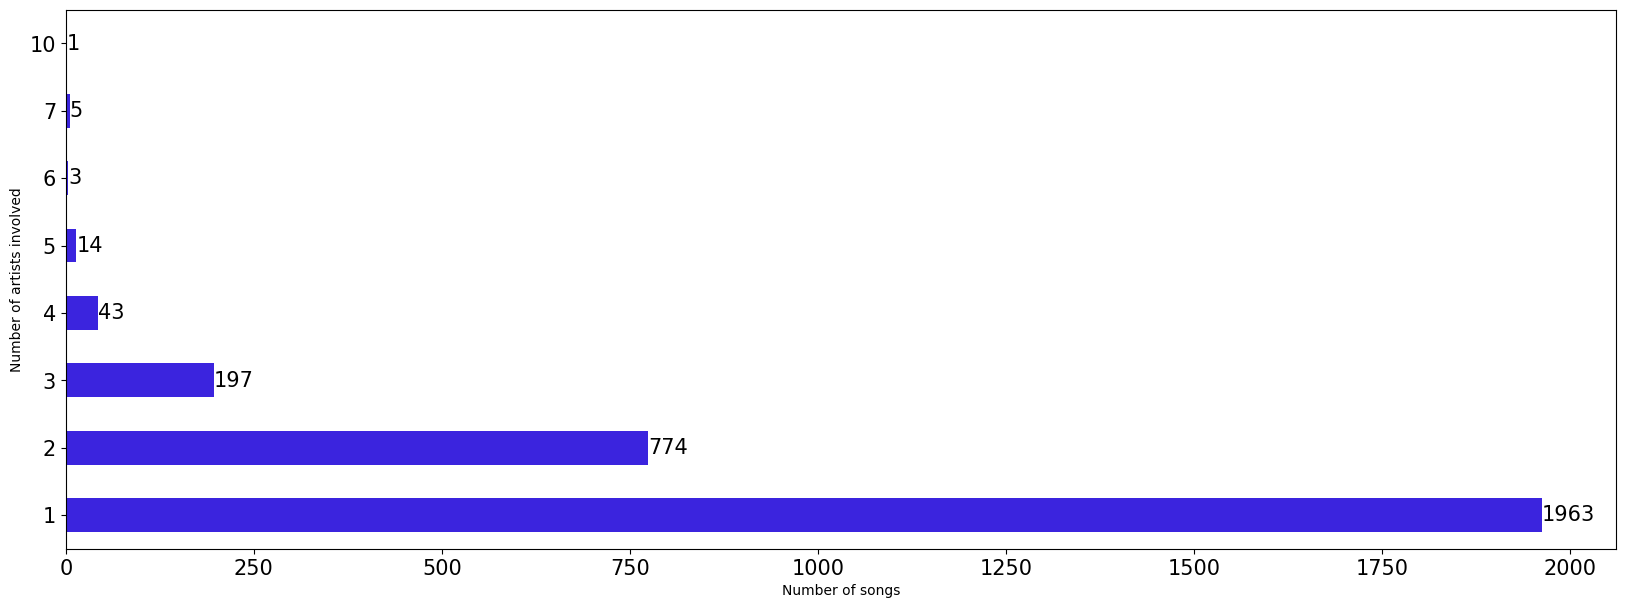

In [56]:
ax = songs_df['artists_count'].value_counts().sort_index(ascending=True).plot(kind='barh', color=(0.23, 0.14, 0.87), figsize=(20, 7), 
                        xlabel='Number of songs', ylabel='Number of artists involved', fontsize=15);
ax.bar_label(ax.containers[0], fontsize=15);

**COMMENT:** There are almost 2000 songs released by only one orginal artists, 750 songs collaborated by 2 artists and less than 250 songs collaborated by 3 artists.

Now let's plot the data into pie chart to reveal each number of artists label its percentage.

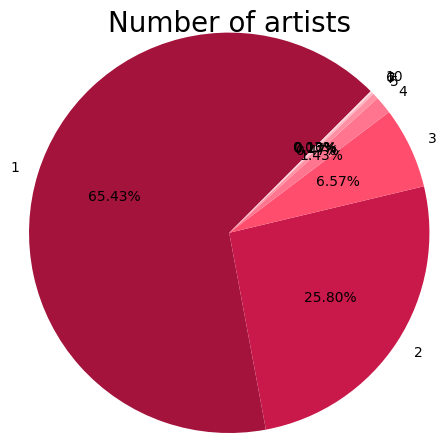

In [57]:
plt.figure(figsize=(8, 5))
plt.title('Number of artists', fontsize=20)
plt.pie(songs_df['artists_count'].value_counts(), 
        labels=songs_df['artists_count'].value_counts().keys(),
        textprops={"fontsize":10},
        radius=1.3, startangle=45,
        colors=['#a4133c', '#c9184a', '#ff4d6d', '#ff758f', '#ff8fa3', '#ffb3c1', '#ffccd5', '#fff0f3'],
        autopct='%.02f%%')
plt.show()

**COMMENT:** From the pie chart above, we can clearly see that songs that produced by only 1 original artist has 65.43%, and the rest 34.57% songs has 2 or more artists collaborated. 

This means the music industry is still dominant by original songs from an artist, but we can deny that recently artists are tend to collaborate with 25.8% songs have 2 artists involved and 6.57% songs that have 3 artists involved.

##### **QUESTION 8:** Get the top 10 albums that have the most total tracks and their popularity score to see the correlation between them

**MEANING:** Know how the number of tracks affect the popularity score by visualizing the top 10 albums with most total of tracks.

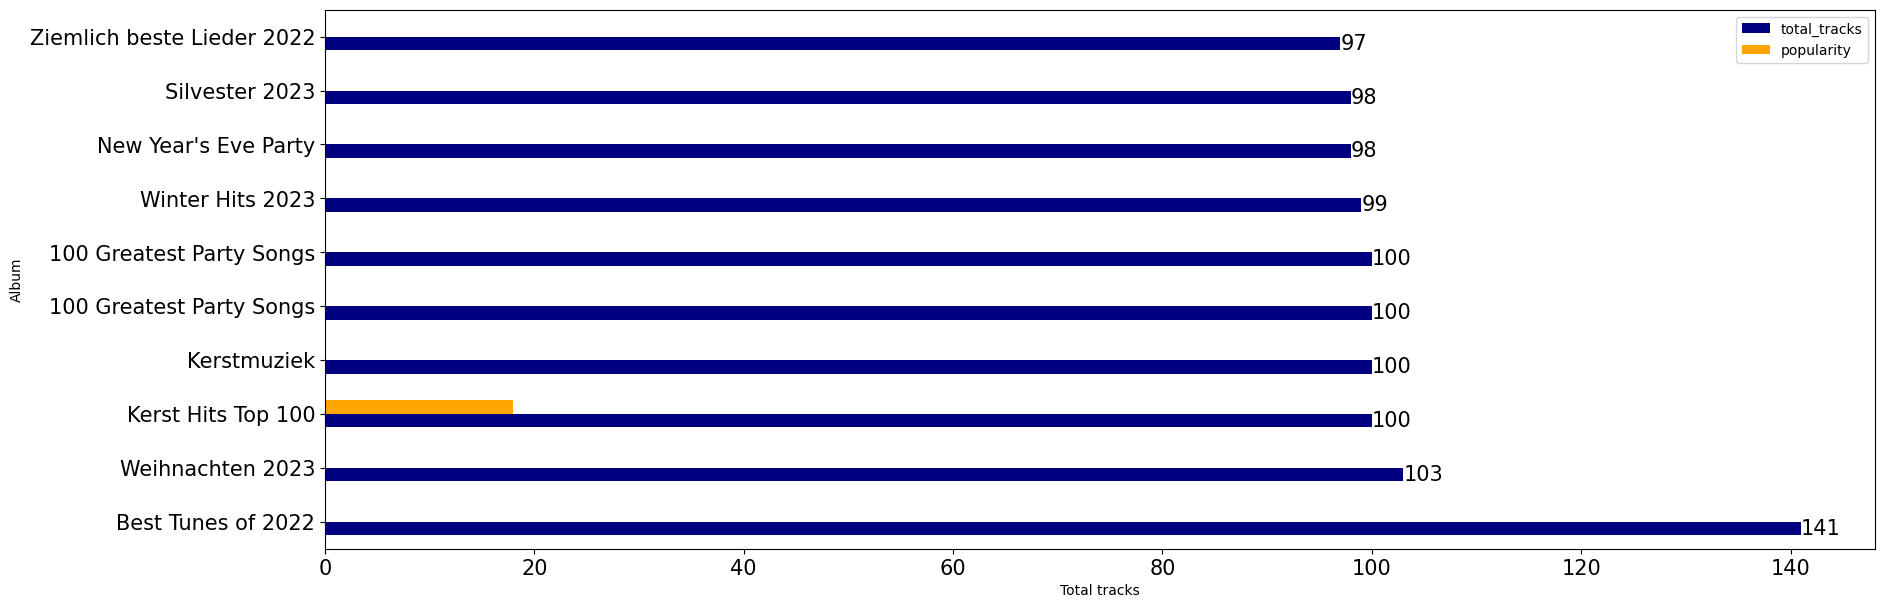

In [58]:
top10_no_tracks = album_df[['name', 'total_tracks', 'popularity']].nlargest(n=10, columns=['total_tracks'])
ax = top10_no_tracks.set_index('name').plot(kind='barh', color=['navy', 'orange'], figsize=(20, 7), 
                        xlabel='Total tracks', ylabel='Album', fontsize=15);
ax.bar_label(ax.containers[0], fontsize=15);

**COMMENT:** As we can see from the bar chart, obviously the number of tracks in an album does not affect its popularity. Moreover, these 2 features are negatively correlated since in these 10 albums, 9 of them has popularity score of 0, the other one's score is approximately 20, which is low. To verify, we shall see the correlation between these 2 features using heatmap.

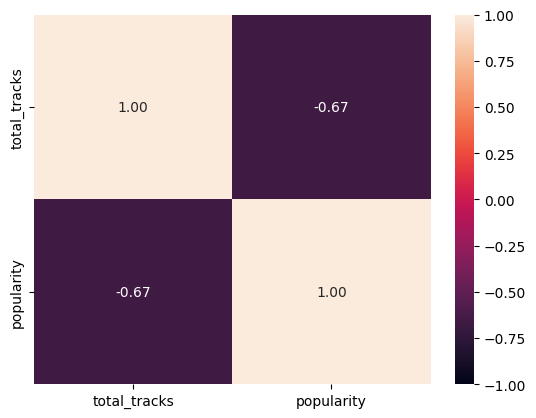

In [59]:
sns.heatmap(album_df[['total_tracks', 'popularity']].corr(method='spearman'), annot=True, fmt=".2f", vmin=-1);

**COMMENT:** The 2 features are heavily negatively correlated to each other with correlation of -0.67. Therefore, an album with a high number of tracks will potientialy have a pretty low popularity score.

##### **QUESTION 9:** Get top 10 artists with the most followers and their popularity score to provide insights about their correlation

**MEANING:** Does the number of followers affect the popularity score of an artist or depending on something else. Therefore, we will understand how the popularity score works.

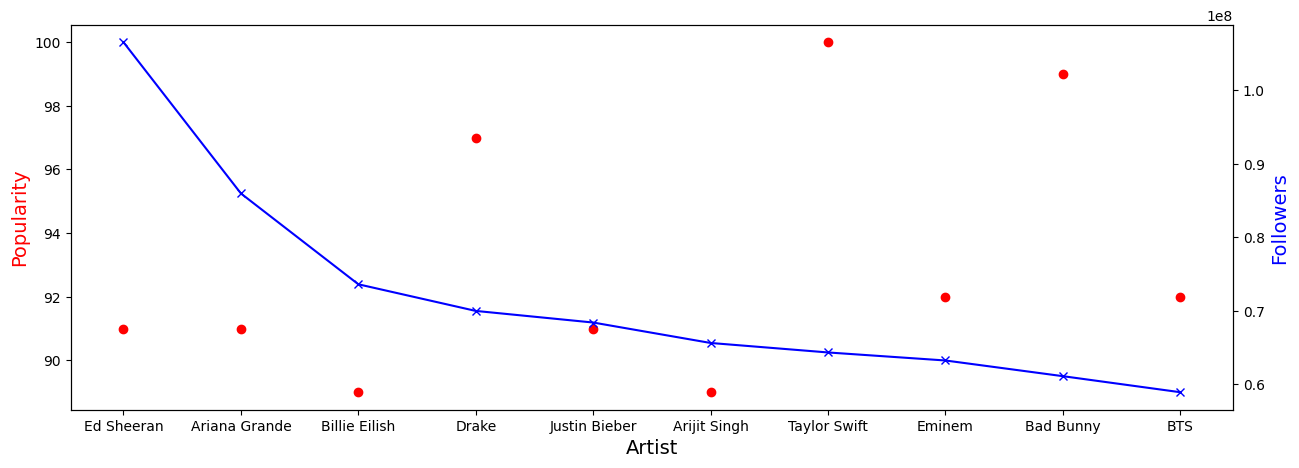

In [60]:
populartity = artists_df[['name', 'popularity', 'followers']].nlargest(n=10, columns=['followers']).set_index('name')

fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(populartity.index, populartity['popularity'], color="red", marker='o')
ax.set_xlabel("Artist", fontsize = 14)
ax.set_ylabel("Popularity", color="red", fontsize=14)

ax2=ax.twinx()
ax2.plot(populartity.index, populartity['followers'], color="blue", marker='x')
ax2.set_ylabel("Followers", color="blue", fontsize=14)
plt.show()

**COMMENT:** As we can see, Ed Sheeran has the highest followers (over 100 million) but the popularity score is not as high as Drake or Taylor Swift even though their followers are just around 60 to 70 million. This gives us an insight that the number of followers does affect to the popularity score, but more important is how active an artist at current time that can make a decent change to an artist's popularity (release a hit single or drop an excellent album currently).

##### **QUESTION 10**: Explore the histogram of all numerical columns in the DataFrame and collect insights

**MEANING**: Figure out how data is distributed according to each column.

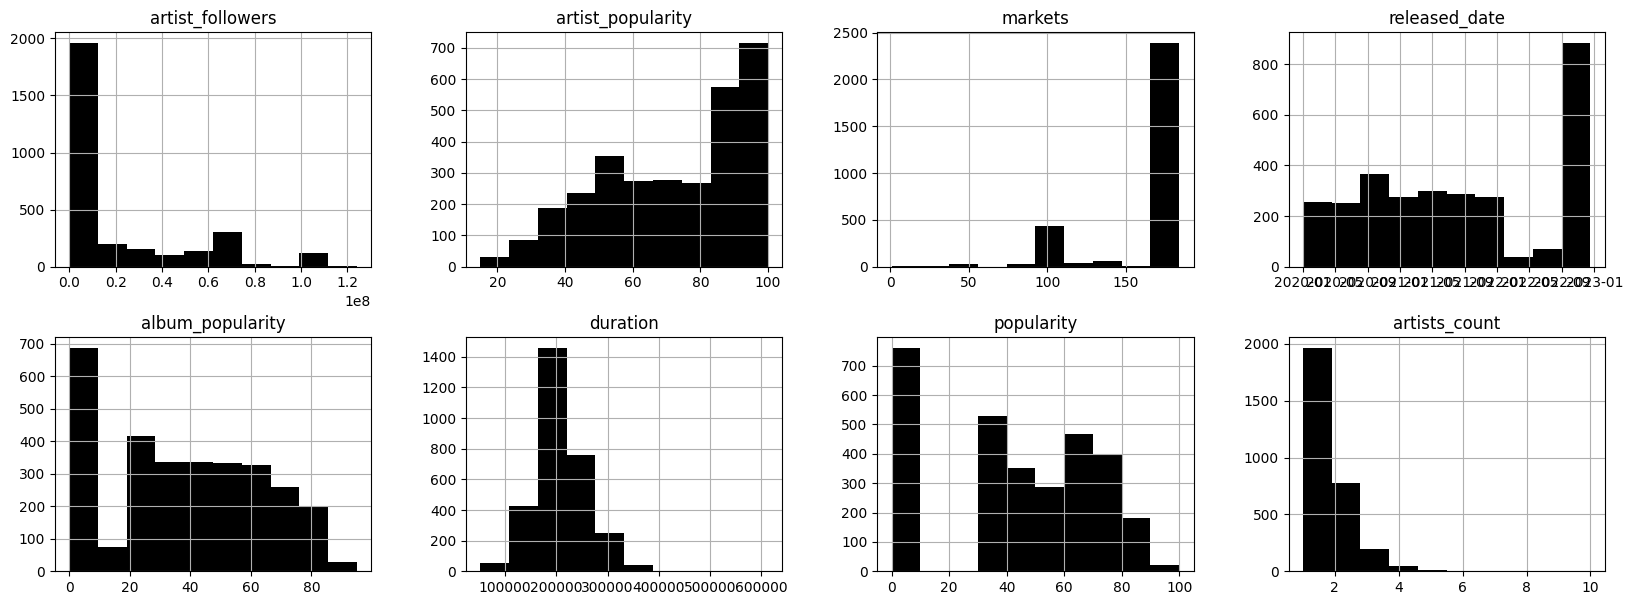

In [61]:
songs_df.hist(layout=(2, 4), figsize=(20, 7), color='black');

**COMMENT:**
- artist_followers: left deviation, since there are some outliers that has a massive value.
- artist_popularity: right deviation, most of the artists has a very good popularity, from 40-100 popularity score.
- markets: right deviation, most of the songs are available worldwide (>= 180 countries).
- released_date: left deviation, right outlier, since in 2020 and 2021 songs are released with the same amount except for the end of 2022 it has a significant amount of songs.
- album_popularity: left deviation, most songs round up in the midrange, from 20 to 80 popularity score.
- duration: left deviation, most songs round up at 200000 ms duration.
- popularity: has the same trend as album popularity
- artists_count: left deviation, as there are 65% of songs that has only 1 artist involved.
- year: perfectly balanced, each year has a precise 1000 songs.
- month: has the same trend as released date, songs has exploding amounts in December of 2022, making December has the most songs in a month.

### <b><u>Step 7</u>: Generate DataFrame used for model training</b>

At this step, we would like to create a DataFrame with only usable numerical columns that will be used for data modeling, predicting a song's popularity based on its features specifically.

The chosen columns are: 
- Feature columns:
    - `aritst_followers`
    - `artist_popularity`
    - `markets`
    - `album_popularity`
    - `duration`
    - `artists_count`
- Label columns:
    - `popularity`

In [62]:
songs_model_df = songs_df[['artist_followers', 'artist_popularity', 'markets', 'album_popularity', 'duration', 'artists_count', 'popularity']]
songs_model_df.head()

,artist_followers,artist_popularity,markets,album_popularity,duration,artists_count,popularity
0,58961886,100,183,81,201391,3,92
1,100162,77,182,60,197333,2,62
2,39690,56,182,52,281493,1,62
3,359817,54,183,50,256663,1,62
4,12005881,81,183,85,273499,1,88


For the next step, let's calculate the correlation of the model DataFrame and predict which features are affected most to each other.

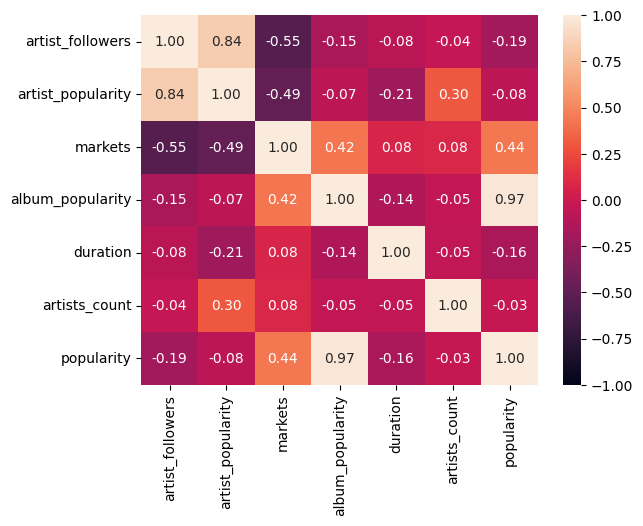

In [63]:
sns.heatmap(songs_model_df.corr(method='spearman'), annot=True, fmt=".2f", vmin=-1);

From the correlation between columns, we could see that there is a high chance that artist_popularity and artist_followers are affected to each other since the correlation between this 2 columns is ~0,84. Another pair that has great impact to each other is album_popularity and popularity, with correlation of ~0.97. 

A prediction from this is album_popularity column will be the best feature to predict a song's popularity while training model.

In [65]:
%store songs_df
%store songs_model_df
%store artists_df

Stored 'songs_df' (DataFrame)
Stored 'songs_model_df' (DataFrame)
Stored 'artists_df' (DataFrame)


----
### <b> This is the end of Phase 2 </b>